In [18]:
import numpy as np
import joblib ### para cargar array
import keras_tuner as kt

########Paquetes para NN #########
import tensorflow as tf
from sklearn import metrics ### para analizar modelo
from sklearn.ensemble import RandomForestClassifier  ### para analizar modelo

import plotly.express as px

In [15]:
model = tf.keras.models.load_model("salidas\\best_model.h5")

In [4]:
x_train = joblib.load('salidas\\x_train.pkl')
y_train = joblib.load('salidas\\y_train.pkl')
x_test = joblib.load('salidas\\x_test.pkl')
y_test = joblib.load('salidas\\y_test.pkl')

In [5]:
x_train2=x_train.reshape(6953,30000)
x_test2=x_test.reshape(1737, 30000)
x_train2.shape
x_test2.shape

(1737, 30000)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       716
           1       0.99      0.94      0.97      1021

    accuracy                           0.96      1737
   macro avg       0.96      0.97      0.96      1737
weighted avg       0.96      0.96      0.96      1737



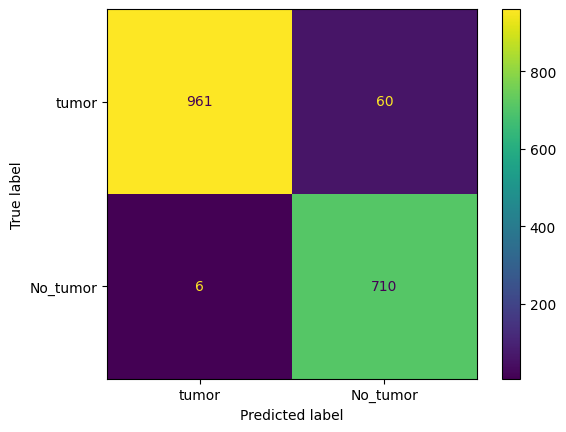

In [16]:
pred_test1 = (model.predict(x_test) >= 0.98).astype('int')
cm = metrics.confusion_matrix(y_test,pred_test1, labels=[1,0])
disp = metrics.ConfusionMatrixDisplay(cm,display_labels=['tumor', 'No_tumor'])
disp.plot()

print(metrics.classification_report(y_test, pred_test1))

In [20]:
pred_test0 = model.predict(x_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [21]:
pred_test0

array([[9.8354303e-06],
       [2.7721808e-06],
       [6.0095843e-08],
       ...,
       [9.4039780e-01],
       [1.1845338e-02],
       [1.8320370e-02]], dtype=float32)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       716
           1       0.98      1.00      0.99      1021

    accuracy                           0.98      1737
   macro avg       0.99      0.98      0.98      1737
weighted avg       0.98      0.98      0.98      1737



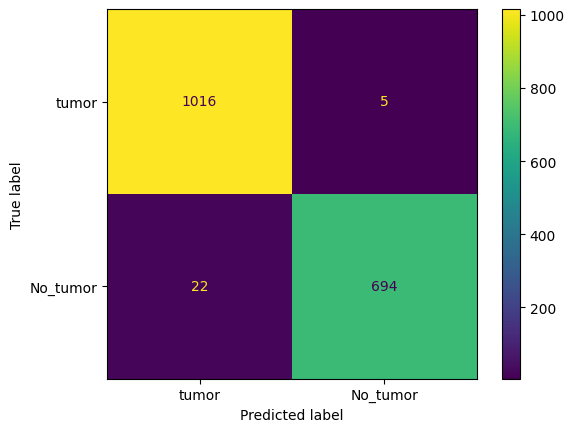

In [65]:
pred_test0 = (model.predict(x_test) > 0.025).astype('int')
cm = metrics.confusion_matrix(y_test, pred_test0, labels = [1,0])
disp = metrics.ConfusionMatrixDisplay(cm,display_labels = ['tumor', 'No_tumor'])
disp.plot()

print(metrics.classification_report(y_test, pred_test0))

In [32]:
p = model.predict(x_test)
hist= px.histogram(p)
hist.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [67]:
pred_test2 = model.predict(x_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [75]:
pred_test2 = model.predict(x_test)
pred_test2 = pred_test2[pred_test2 > 0.025]
pred_test2 = pred_test2[pred_test2 < 0.975]
pred_test2.shape

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


(61,)

In [78]:
61/(699+61+977)

0.03511801957397812